Compare 2k and 10K analysis of MBAs, to see what differences might be there. Can we use 2k as an approximate statistical sampling? (looks like yes).  

In [395]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as moMetrics
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.db as db

In [112]:
slicers = {}
objtypes = ['mba_10k', 'mba_2k']

In [121]:
obj = 'mba_2k'
Hrange = np.arange(15, 26, 0.25)
orbitfile = 'ssm_2k/mbas_2k.des'
obsfile = 'ssm_2k/mbas_2k_allObs.txt'
slicers[obj] = MoSlicer(orbitfile, Hrange=Hrange)
slicers[obj].readObs(obsfile)

In [122]:
obj = 'mba_10k'
orbitfile = 'mbas_10k.des'
obsfile = 'mbas_10k_allObs.txt'
slicers[obj] = MoSlicer(orbitfile, Hrange=Hrange)
slicers[obj].readObs(obsfile)

In [123]:
runName = 'enigma_1189'

In [124]:
mBundles = {}

for obj in objtypes:
    mbundles = {}
    slicer = slicers[obj]
    plotDict = {}
    pandasConstraint = None
    metadata = obj
    metric = moMetrics.NObsMetric()
    mbundles['NObs'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.DiscoveryChancesMetric()
    mbundles['Discoveries'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                   runName=runName, metadata=metadata, plotDict=plotDict)

    metric = moMetrics.ObsArcMetric()
    mbundles['Arclength'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                              runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.NNightsMetric()
    mbundles['NNights'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                            runName=runName, metadata=metadata, plotDict=plotDict)
    mBundles[obj] = mbundles

In [125]:
outDir = 'mba_comp'
resultsDb = db.ResultsDb(outDir=outDir)
for obj in objtypes:
    mbg = mmb.MoMetricBundleGroup(mBundles[obj], outDir=outDir, resultsDb=resultsDb)
    mbg.runAll()
    discovery = mBundles[obj]['Discoveries']
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    mBundles[obj]['completeness'] = completeness
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    mBundles[obj]['completenessInt'] = completenessInt

Calculated all metrics.
Calculated all metrics.


1

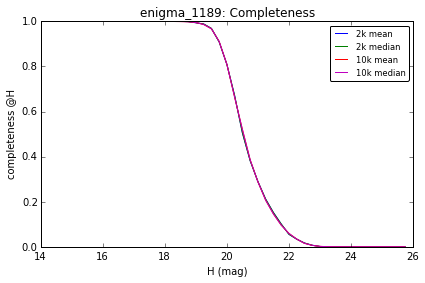

In [126]:
ph = plots.PlotHandler()
plotFunc = moPlots.MetricVsH()
mplot = 'completeness'
ph.setMetricBundles([mBundles['mba_2k'][mplot], mBundles['mba_2k'][mplot],
                     mBundles['mba_10k'][mplot], mBundles['mba_10k'][mplot]])
ph.setPlotDicts([{'color':'b', 'npReduce':np.mean, 'label':'2k mean'}, 
                 {'color':'g', 'npReduce':np.median, 'label':'2k median'},
                {'color':'r', 'npReduce':np.mean, 'label':'10k mean'}, 
                {'color':'m', 'npReduce':np.median, 'label':'10k median'}])
ph.plot(plotFunc=plotFunc, plotDicts={'ylabel':'%s @H' %(mplot)})

In [131]:
Hmark = 21.0
summaryMetric = ValueAtHMetric(Hmark=Hmark)
mBundles['mba_10k']['completeness'].setSummaryMetrics(summaryMetric)
mBundles['mba_10k']['completeness'].computeSummaryStats()
print '10k', np.mean(mBundles['mba_10k']['completeness'].summaryValues['Value At H=%.1f' %(Hmark)])
mBundles['mba_2k']['completeness'].setSummaryMetrics(summaryMetric)
mBundles['mba_2k']['completeness'].computeSummaryStats()
print '2k', np.mean(mBundles['mba_2k']['completeness'].summaryValues['Value At H=%.1f' %(Hmark)])

10k 0.288428842884
2k 0.289644822411


Great. Let's look at bodies throughout the solar system. 

In [2]:
# Go through all types of objects, with 2k results. 
moslicers = {}
objtypes = ['neos', 'mbas', 'trojans', 'tnos', 'sdos', 'comets']
Hrange = np.arange(5, 27, 0.25)
for obj in objtypes:
    orbitfile = os.path.join('ssm_2k', obj+'_2k.des')
    moslicers[obj] = MoSlicer(orbitfile, Hrange)
    obsfile = os.path.join('ssm_2k', obj+'_2k_allObs.txt')
    moslicers[obj].readObs(obsfile)

In [3]:
runName = 'enigma_1189'
allBundles = {}
for obj in objtypes:
    bundles = {}
    slicer = moslicers[obj]
    plotDict = {}
    pandasConstraint = None
    metadata = obj
    metric = moMetrics.NObsMetric()
    bundles['NObs'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.NObsNoSinglesMetric()
    bundles['NObs NoSingles'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.DiscoveryChancesMetric()
    bundles['Discoveries'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                   runName=runName, metadata=metadata, plotDict=plotDict)

    metric = moMetrics.ObsArcMetric()
    bundles['Arclength'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                              runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.NNightsMetric()
    bundles['N Nights'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                            runName=runName, metadata=metadata, plotDict=plotDict)
    window = 180.0
    metric = moMetrics.ActivityOverTimeMetric(window, metricName='Chances of Detecting Activity lasting %.0f days' %(window))
    bundles['Chance of Detecting Activity (6 mnth)'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                                runName=runName, metadata=metadata, plotDict=plotDict)
    window = 90.
    metric = moMetrics.ActivityOverTimeMetric(window, metricName='Chances of Detecting Activity lasting %0.f days' %(window))
    bundles['Chance of Detecting Activity (3 mnth)'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                                runName=runName, metadata=metadata, plotDict=plotDict)
    allBundles[obj] = bundles

In [4]:
outDir = 'ssm_2k_comp'
resultsDb = db.ResultsDb(outDir=outDir)
for obj in objtypes:
    mbg = mmb.MoMetricBundleGroup(allBundles[obj], outDir=outDir, resultsDb=resultsDb)
    mbg.runAll()
    discovery = allBundles[obj]['Discoveries']
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    allBundles[obj]['completeness'] = completeness
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    allBundles[obj]['completenessInt'] = completenessInt

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


In [174]:
plotdicts = {}
plotdicts['neos'] = {'color':'cyan', 'label':'NEOs'}
plotdicts['mbas'] = {'color':'g', 'label':'MBAs'}
plotdicts['trojans'] = {'color':'y', 'label':'TR5s'}
plotdicts['tnos'] = {'color':'r', 'label':'TNOs'}
plotdicts['sdos'] = {'color':'m', 'label':'SDOs'}
plotdicts['comets'] = {'color':'k', 'label':'Comets'}

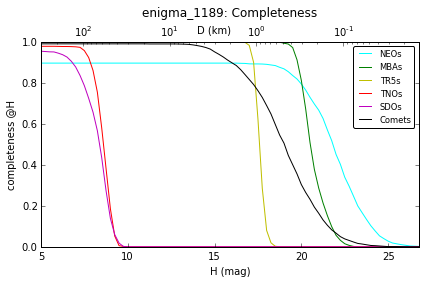

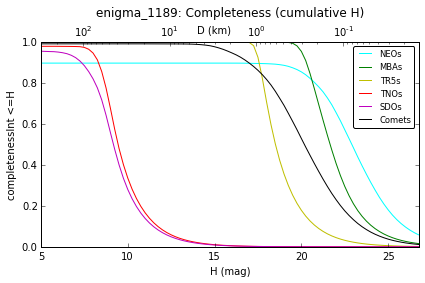

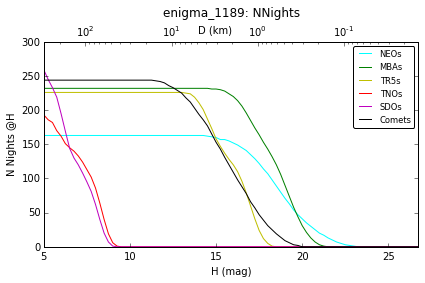

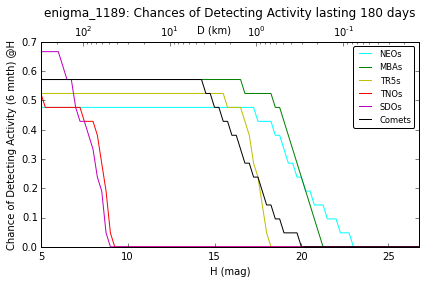

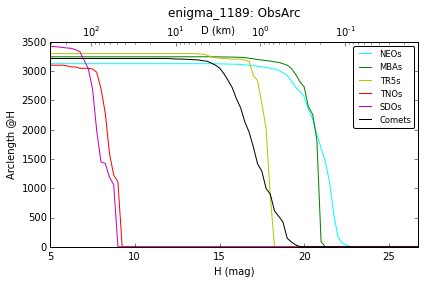

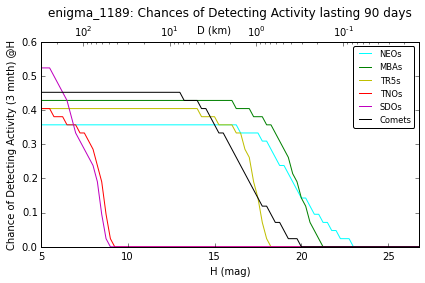

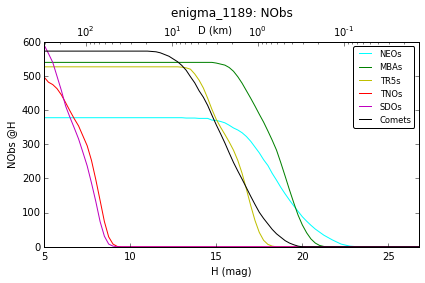

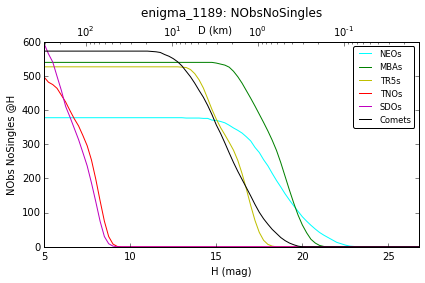

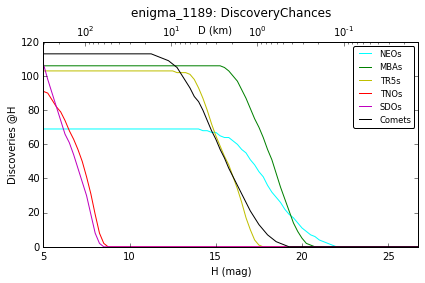

In [350]:
reload(moPlots)
objtypes = ['neos', 'mbas', 'trojans', 'tnos', 'sdos', 'comets']
Hrange = np.arange(5, 27, 0.25)
for mplot in allBundles['neos'].keys():
    ph = plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
    plotFunc = moPlots.MetricVsH()
    bundles = []
    pds = []
    for obj in objtypes:
        bundles.append(allBundles[obj][mplot])
        pds.append(plotdicts[obj])
    ph.setMetricBundles(bundles)
    ph.setPlotDicts(pds)
    ylabel = '%s %s' %(mplot, bundles[0].plotDict['units'])
    ph.plot(plotFunc=plotFunc, plotDicts={'npReduce':np.median, 'ylabel':ylabel, 'albedo':0.14,
                                         'xMin':Hrange[0], 'xMax':Hrange[-1]})

In [111]:
mval = 'NObs'
Hmark = 20.0
summaryMetric = ValueAtHMetric(Hmark=Hmark)
for obj in objtypes:
    allBundles[obj][mval].setSummaryMetrics(summaryMetric)
    allBundles[obj][mval].computeSummaryStats()
    print obj, Hmark, mval, np.median(allBundles[obj][mval].summaryValues['Value At H=%.1f' %(Hmark)])

neos 20.0 NObs 88.0
mbas 20.0 NObs 64.0
trojans 20.0 NObs 0.0
tnos 20.0 NObs 0.0
sdos 20.0 NObs 0.0
comets 20.0 NObs 0.0


In [69]:
mag_sun = -27.1 
km_per_au = 1.496e8
albedo = 0.14
diameter = 2.0 * np.sqrt(10**((mag_sun - Hrange - 2.5*np.log10(albedo))/2.5))
diameter = diameter * km_per_au
for H, d in zip(Hrange, diameter):
    print H, d

5.0 304.016791546
5.25 270.955250674
5.5 241.489121355
5.75 215.227405957
6.0 191.821627471
6.25 170.961205438
6.5 152.369334731
6.75 135.799312522
7.0 121.031264683
7.25 107.869228192
7.5 96.1385508222
7.75 85.6835736111
8.0 76.3655653635
8.25 68.0608817714
8.5 60.6593247289
8.75 54.0626800712
9.0 48.1834143315
9.25 42.9435132254
9.5 38.2734464489
9.75 34.1112450532
10.0 30.4016791546
10.25 27.0955250674
10.5 24.1489121355
10.75 21.5227405957
11.0 19.1821627471
11.25 17.0961205438
11.5 15.2369334731
11.75 13.5799312522
12.0 12.1031264683
12.25 10.7869228192
12.5 9.61385508222
12.75 8.56835736111
13.0 7.63655653635
13.25 6.80608817714
13.5 6.06593247289
13.75 5.40626800712
14.0 4.81834143315
14.25 4.29435132254
14.5 3.82734464489
14.75 3.41112450532
15.0 3.04016791546
15.25 2.70955250674
15.5 2.41489121355
15.75 2.15227405957
16.0 1.91821627471
16.25 1.70961205438
16.5 1.52369334731
16.75 1.35799312522
17.0 1.21031264683
17.25 1.07869228192
17.5 0.961385508222
17.75 0.856835736111
18.0

In [86]:
slicer = moslicers['mbas']
windows = np.arange(1, 40, 3)*5
print windows
abundles = {}
for w in windows:
    metric = moMetrics.ActivityOverTimeMetric(w, metricName='Chances of Detecting Activity lasting %.0f days' %(w))
    abundles['Activity %.0f' %w] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                                    runName=runName, metadata=metadata, plotDict=plotDict)

[  5  20  35  50  65  80  95 110 125 140 155 170 185]


In [87]:
outDir = 'ssm_2k_comp'
resultsDb = db.ResultsDb(outDir=outDir)
mbg = mmb.MoMetricBundleGroup(abundles, outDir=outDir, resultsDb=resultsDb)
mbg.runAll()

Calculated all metrics.


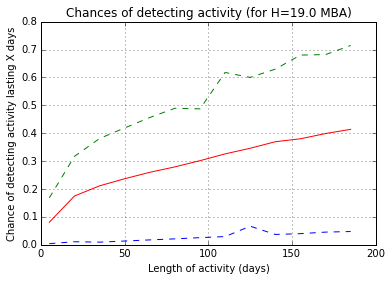

In [90]:
# Plot the min/mean/max of the fraction of activity detection opportunities, over all objects
# Need to make more summary statistics to do this more elegantly.
meanFraction = np.zeros(len(windows), float)
minFraction = np.zeros(len(windows), float)
maxFraction = np.zeros(len(windows), float)

Hmark = 19.0
Hidx = np.where(Hrange == Hmark)[0]
for i, w in enumerate(windows):
    b = abundles['Activity %.0f' %w]
    meanFraction[i] = np.mean(b.metricValues.swapaxes(0, 1)[Hidx])
    minFraction[i] = np.min(b.metricValues.swapaxes(0, 1)[Hidx])
    maxFraction[i] = np.max(b.metricValues.swapaxes(0, 1)[Hidx])
    
plt.figure()
plt.plot(windows, meanFraction, 'r', label='Mean')
plt.plot(windows, minFraction, 'b--', label='Min')
plt.plot(windows, maxFraction, 'g--', label='Max')
plt.xlabel('Length of activity (days)')
plt.ylabel('Chance of detecting activity lasting X days')
plt.title('Chances of detecting activity (for H=%.1f MBA)' %(Hmark))
plt.grid()
plt.savefig(os.path.join(outDir, 'activity.png'), format='png')

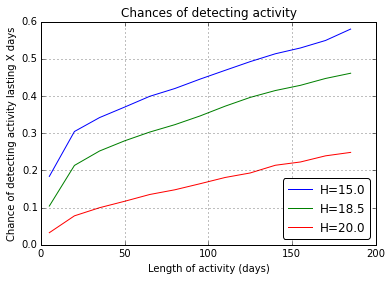

In [109]:
meanFraction = {}
Hs = [15, 18.5, 20]
for Hmark in  Hs:
    meanFraction[Hmark] = np.zeros(len(windows), float)
    Hidx = np.where(Hrange == Hmark)[0]
    for i, w in enumerate(windows):
        b = abundles['Activity %.0f' %w]
        meanFraction[Hmark][i] = np.mean(b.metricValues.swapaxes(0, 1)[Hidx])

for H in Hs:
    plt.plot(windows, meanFraction[H], label='H=%.1f' %H)
plt.xlabel('Length of activity (days)')
plt.ylabel('Chance of detecting activity lasting X days')
plt.title('Chances of detecting activity')
plt.grid()
plt.legend(loc='lower right', fancybox=True, numpoints=1)
plt.savefig(os.path.join(outDir, 'activity2.png'), format='png')

Revisit the 10K MBAs and make more detailed plots (for Asteroids presentation at IAU). 

{'MetricVsH': 1, 'MetricVsOrbit': 3}

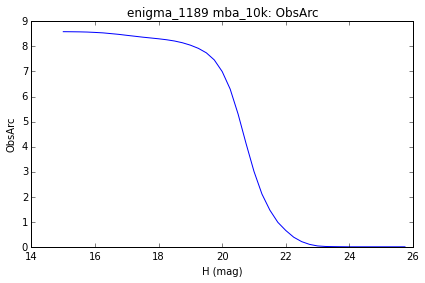

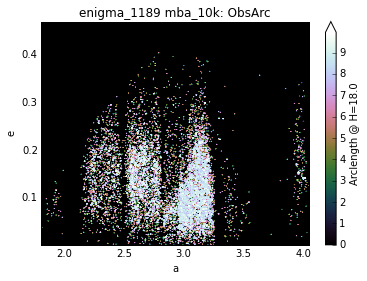

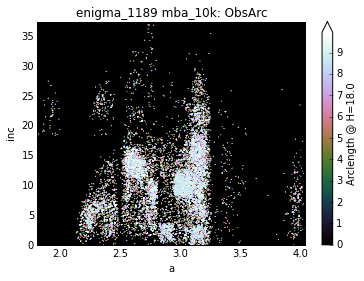

In [183]:
Hrange = np.arange(15, 26, 0.25)
m = 'Arclength'
ph = plots.PlotHandler(outDir = 'mba_comp', figformat='png', dpi=600, thumbnail=False)
plotFuncs = [moPlots.MetricVsH(), moPlots.MetricVsOrbit(xaxis='a', yaxis='e'), 
             moPlots.MetricVsOrbit(xaxis='a', yaxis='inc')]
mBundles['mba_10k'][m].setPlotFuncs(plotFuncs)
mBundles['mba_10k'][m].setPlotDict({'nxbins':300, 'nybins':300, 
                                         'Hval':18, 'label':m, 'colorMin':0, 'colorMax':10})
mBundles['mba_10k'][m].plot(plotHandler=ph, savefig=True)

{'MetricVsH': 1}

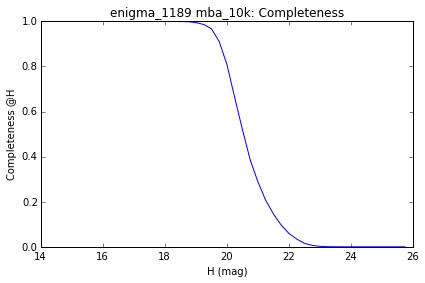

In [542]:
m = 'completeness'
ph = plots.PlotHandler(outDir = 'mba_comp', figformat='png', dpi=600, thumbnail=False)
plotFuncs = [moPlots.MetricVsH()]
mBundles['mba_10k'][m].setPlotFuncs(plotFuncs)
mBundles['mba_10k'][m].setPlotDict({})
mBundles['mba_10k'][m].plot(plotHandler=ph, savefig=True)

(3, 27)

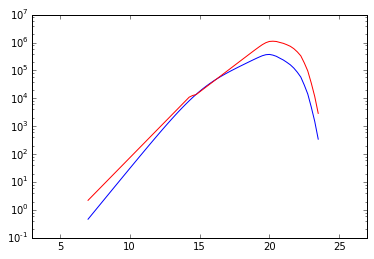

In [588]:
# Turn completeness into number of objects.
Hrange = np.arange(15, 26, 0.25)
Hbinsize = np.unique(np.diff(Hrange))[0]
Hextension = np.arange(7, Hrange.min()-Hbinsize/2.0, Hbinsize)
bigHrange = np.concatenate([Hextension, Hrange])
bigcompleteness = np.concatenate([np.ones(len(Hextension)), mBundles['mba_10k']['completeness'].metricValues[0]])

diffHrange = np.concatenate([(bigHrange - Hbinsize/2.0), np.array([Hrange.max() + Hbinsize/2.0])])
x = diffHrange - 15.7
ncum = 267000 * (np.power(10, 0.43*x))/(np.power(10, 0.18*x) + np.power(10, -0.18*x))
ndiff = ncum[1:] - ncum[:-1]
nfound = ndiff * bigcompleteness

ncum2 = np.zeros(len(diffHrange))
C = np.log10(50000) # @ H=14.5
condition = np.where(diffHrange>14.5)
ncum2[condition] = np.power(10, C + 0.38 * (diffHrange[condition] - 14.5) )
condition = np.where(diffHrange<=14.5)
ncum2[condition] = np.power(10, C + 0.51 * (diffHrange[condition] - 14.5))
ndiff2 = ncum2[1:] - ncum2[:-1]
nfound2 = ndiff2 * bigcompleteness
#for H, N, Nf in zip(Hrange, ncum, nfound):
#    print H, N, Nf
plt.figure()
plt.semilogy(bigHrange, nfound)
plt.semilogy(bigHrange, nfound2, 'r-')
plt.xlim(3, 27)

In [428]:
import pandas as pd
ast = pd.read_table('asteroidDb/mpc_mba.dat', delim_whitespace=True, error_bad_lines=False)

In [429]:
ast.columns.values

array(['Desn', 'H', 'G', 'Epoch', 'M', 'Peri.', 'Node', 'Incl.', 'e', 'n',
       'a', '#Obs', '#Opp', 'Arc'], dtype=object)

(3, 27)

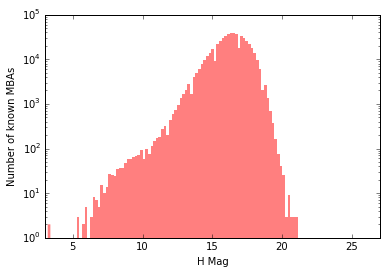

In [469]:
ast['H'].plot(kind='hist', bins=100, logy=True, alpha=0.5, color='r', edgecolor='none', label='Known MBAs')
plt.xlabel('H Mag')
plt.ylabel('Number of known MBAs')
plt.xlim(3, 27)

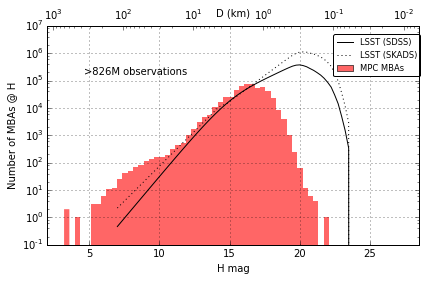

In [589]:
plt.plot(bigHrange, nfound,  color='k', label='LSST (SDSS)')
plt.plot(bigHrange, nfound2, color='k', linestyle=':', label='LSST (SKADS)')
plt.hist(ast['H'], bins=50, alpha=0.6, color='r', edgecolor='none', label='MPC MBAs')
leg = plt.legend(loc=(0.77, 0.77), fancybox=True, numpoints=1, fontsize='smaller')
leg.get_frame().set_zorder(0)
leg.get_frame().set_facecolor('white')
plt.ylabel("Number of MBAs @ H")
plt.xlabel("H mag")
plt.xlim(2, 28.5)

mag_sun = -27.1 
km_per_au = 1.496e8
albedo = 0.14
ax = plt.axes()
ax2 = ax.twiny()
hmin, hmax = ax.get_xlim()
dmax = 2.0 * np.sqrt(10**((mag_sun - hmin - 2.5*np.log10(albedo))/2.5))
dmin = 2.0 * np.sqrt(10**((mag_sun - hmax - 2.5*np.log10(albedo))/2.5))
dmax = dmax * km_per_au
dmin = dmin * km_per_au
ax2.set_xlim(dmax, dmin)
ax2.set_xscale('log')
ax2.set_xlabel('D (km)', labelpad=-10, horizontalalignment='center')
plt.sca(ax)
plt.grid(True)
ax.set_yscale('log')
plt.figtext(0.2, 0.72, '>826M observations')
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'N_MBAs.png'), dpi=600)

In [ ]:
# Calculate completeness & number of objects as a function of time. 
tBundles = {}
times = np.arange(1, 11, 1)
for t in times:
    tBundles[t] = {}
    slicer = slicers['mba_10k']
    plotDict = {}
    pandasConstraint = 'night<=%d' %(t*365)
    metadata = 'year %d' %t
    metric = moMetrics.NObsMetric()
    tBundles[t]['NObs'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = moMetrics.DiscoveryChancesMetric()
    tBundles[t]['Discoveries'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                   runName=runName, metadata=metadata, plotDict=plotDict)

In [401]:
outDir = 'mba_comp'
resultsDb = db.ResultsDb(outDir)
for t in times:
    mbg = mmb.MoMetricBundleGroup(tBundles[t], outDir=outDir, resultsDb=resultsDb)
    mbg.runAll()
    discovery = tBundles[t]['Discoveries']
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    tBundles[t]['completeness'] = completeness
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    tBundles[t]['completenessInt'] = completenessInt

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


year 1 night<=365 night<=365 1 1678113.56252 0.333055500575
year 2 night<=730 night<=730 2 3074459.9844 0.610188626069
year 3 night<=1095 night<=1095 3 3705753.29178 0.735481522327
year 4 night<=1460 night<=1460 4 4205787.80781 0.834723462659
year 5 night<=1825 night<=1825 5 4429826.35787 0.879188433986
year 6 night<=2190 night<=2190 6 4584733.5243 0.909932887168
year 7 night<=2555 night<=2555 7 4710336.83061 0.934861397962
year 8 night<=2920 night<=2920 8 4844364.25298 0.961461844586
year 9 night<=3285 night<=3285 9 4947381.78874 0.981907753437
year 10 night<=3650 night<=3650 10 5038540.30221 1.0


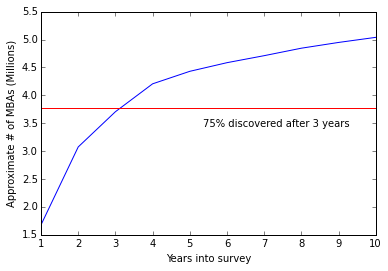

In [545]:
# Turn completeness into number of objects.
Hrange = slicer.slicePoints['H']
Hbinsize = np.unique(np.diff(Hrange))[0]
Hextension = np.arange(10, Hrange.min()-Hbinsize/2.0, Hbinsize)
bigHrange = np.concatenate([Hextension, Hrange])
diffHrange = np.concatenate([(bigHrange - Hbinsize/2.0), np.array([Hrange.max() + Hbinsize/2.0])])
x = diffHrange - 15.7
ncum = 267000 * (np.power(10, 0.43*x))/(np.power(10, 0.18*x) + np.power(10, -0.18*x))
ndiff = ncum[1:] - ncum[:-1]
ncum2 = np.zeros(len(diffHrange))
C = np.log10(50000) # @ H=14.5
condition = np.where(diffHrange>14.5)
ncum2[condition] = np.power(10, C + 0.38 * (diffHrange[condition] - 14.5) )
condition = np.where(diffHrange<=14.5)
ncum2[condition] = np.power(10, C + 0.51 * (diffHrange[condition] - 14.5))
ndiff2 = ncum2[1:] - ncum2[:-1]

ncounts = np.zeros(len(times))
for i, t in enumerate(times):
    bigcompleteness = np.concatenate([np.ones(len(Hextension)), tBundles[t]['completeness'].metricValues[0]])
    nfound = ndiff * bigcompleteness
    ncounts[i] = nfound.sum()
for t, c in zip(times, ncounts):
    print tBundles[t]['completeness'].metadata, t, c, c/ncounts[-1]
plt.plot(times, ncounts/1000000.)
plt.xlabel('Years into survey')
plt.ylabel('Approximate # of MBAs (Millions)')
#plt.axvline(3, color='b', linestyle=':')
plt.axhline(ncounts[-1]*.75/1000000.0, color='r', linestyle='-')
plt.figtext(0.5, 0.5, '75%s discovered after 3 years' %('%'))
plt.savefig(os.path.join(outDir, 'N_MBAPerYear.png'))

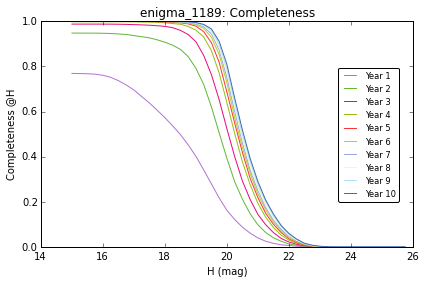

In [499]:
tb = []
tbpd = []
for t in times:
    tb.append(tBundles[t]['completeness'])
    tbpd.append({'label':"Year %d" %t})
ph.setMetricBundles(tb)
ph.setPlotDicts(tbpd)
ph.plot(plotFunc=moPlots.MetricVsH(), plotDicts={'legendloc':(0.8, 0.2)})
plt.savefig(os.path.join(outDir,'Completeness_time.png'))

In [587]:
# Total expected number of observations
med_nobsH = np.median(mBundles['mba_10k']['NObs'].metricValues, axis=0)
# Extend nobsH down to smaller H sizes, like above. Assume it's approximately a straight line.
extend_nobsH = np.concatenate([np.ones(len(Hextension))*med_nobsH[0], med_nobsH])
totalNObs = np.sum(extend_nobsH * ndiff)
print totalNObs/1000000.

826.408090253
